In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
data = np.loadtxt("IntensitySpectralIndex.txt",dtype={'names':('element','Z','A','j0','alpha'),
                                                      'formats':('S2','i4','i4','f8','f8')},skiprows=3)

In [112]:
#Energía
Emax=10e3 #TeV
def energy(Z):
    Emin=Z*10e-3 #TeV
    steps = 100000
    energy = np.linspace(Emin,Emax,steps)
    return energy

In [103]:
#Flujo de núcleos
def flujo(E,j,a):
    diff=Emax**(a+1)-(E)**(a+1)
    return (3.1378*j0/(a+1))*diff

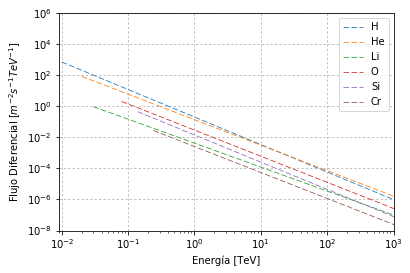

In [134]:
#Gráfica de flujo diferencial
for i in [1,2,3,8,14,24]:
    Z=i
    name = data[Z-1][0].decode('utf-8')
    j0=data[Z-1][3]
    a=data[Z-1][4]
    eng = energy(Z)
    flux = flujo(eng,j0,a)*10**4
    plt.loglog(eng,flux,'--',lw=0.8,basex=10,label='%s'%(name))

plt.ylim([10**(-8),10**6])
plt.xlim([9*10**(-3),10**3])
plt.grid(linestyle='dotted')
plt.legend()
plt.xlabel('Energía [TeV]')
plt.ylabel(r'Flujo Diferencial $[m^{-2}s^{-1}TeV^{-1}]$')
plt.savefig('FlujoDiferencialPrimarios.pdf');

In [127]:
#Valores de flujo diferencial
print("Elemento","Flujo")
total = 0
for i in range(1,27):
    Z=i
    name = data[Z-1][0].decode('utf-8')
    j0=data[Z-1][3]
    a=data[Z-1][4]
    eng = energy(Z)
    flux = flujo(eng,j0,a)*10**4
    total+=flux[0]*7*3600
    print(name,"\t %.1f"%flux[0])
print("Flujo Total:",total)

Elemento Flujo
H 	 706.9
He 	 84.1
Li 	 0.9
Be 	 0.2
B 	 0.5
C 	 2.1
N 	 0.4
O 	 2.0
F 	 0.0
Ne 	 0.4
Na 	 0.1
Mg 	 0.5
Al 	 0.1
Si 	 0.4
P 	 0.0
S 	 0.1
Cl 	 0.0
Ar 	 0.0
K 	 0.0
Ca 	 0.0
Sc 	 0.0
Ti 	 0.0
V 	 0.0
Cr 	 0.0
Mn 	 0.0
Fe 	 0.0
Flujo Total: 20135457.1051


In [133]:
k = np.array([42449.63,5046.24,128.30,122.51,56.31,29.76,29.76,26.73,24.93,23.05,18.08,14.25,4.76,3.86,3.34,2.51,2.14,1.66,1.60,1.51
,1.32,0.95,0.80,0.74,0.65,0.45])
k=k*1e-2
t=0
for i in k:
    t+=i*7*3600
print("Flujo Total:",t)   

Flujo Total: 12094951.68
